# K-Means Clustering

CLustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Standard imports:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Introducing K-Means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

for example, let's generate a two-dimentional dataset containing four distinct blobs:

<IPython.core.display.Javascript object>


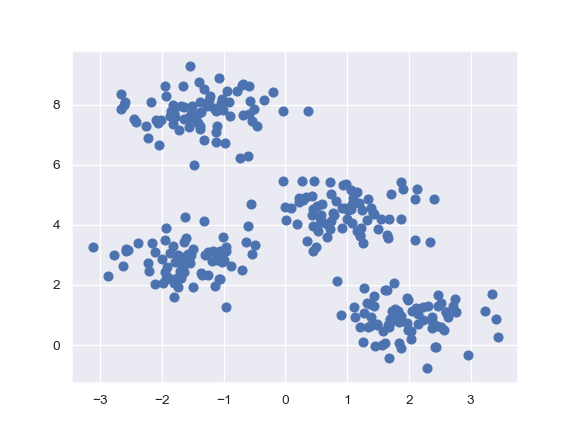

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<IPython.core.display.Javascript object>


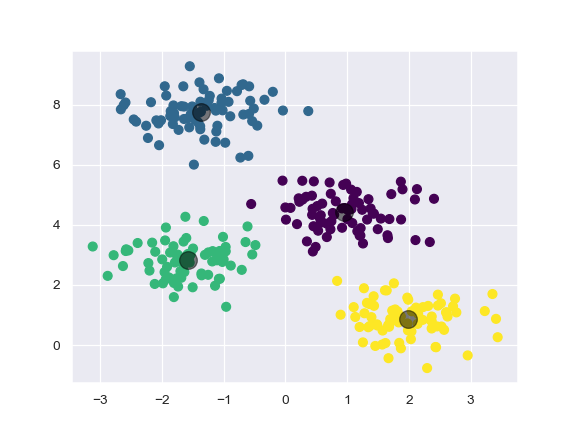

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

>The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.

## # K-Means Algorithm: expectation - Maximation

Expectation-maximization (E-M) is a powrful algorithm that comes up in a variety of contexts within data science. K-menas is particularly simple and easy-to understand application of the algorithm, and we will walk through it briefly here. In short, the expectation-maximization approach here consists of the following procedure:
    1. Guess some custer centers
    2. Repeat until converged
        a. E-step: assign points to the nearest cluster center
        b. M-step: set the cluster centers to the mean